In [5]:
##Library for loading data
import m24
##Basic libraries for plotting and working with arrays
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import numpy as np
import Funciones as fn
###  Standard deviation, skewness and kurtosis
import numpy.std as std
from scipy.stats import skew
from scipy.stats import kurtosis


In [6]:
### Array for of times
times=np.arange(-2.001, 8, 0.001)
#Index for every condition
#indexes of f1
inf=np.where(times>=0)[0]
sup=np.where(times<=0.5)[0]
i_f1=np.intersect1d(inf,sup)
#index of interstimulus delay
infd=np.where(times>=0.5)[0]
supd=np.where(times<=3.5)[0]
i_delay=np.intersect1d(infd,supd)
#index of f2
inf2=np.where(times>=3.5)[0]
sup2=np.where(times<=4)[0]
i_f2=np.intersect1d(inf2,sup2)
#index of decision 
i_de=np.where(times>=4)[0]

In [7]:
# Loading the files
path_to_file_directory = "C:/Users/sound/Documents/DatosLFP_Saskia/preprocessed_task"
files = m24.getFilelist(path_to_file_directory)
nexp=len(files)# number of experiments

In [15]:
#number of experiment
e=0
# loading the data 
exp_id=m24.getSessionID(files[e])
data, electrodes, trials, info = m24.loadSaskia(files[e]) # data of a particular exp
e_keys=list(electrodes[1])# names of the electrodes in this exp
## creating a dictionary
elt_cond={name:[[],[],[],[]] for name in e_keys}#[0] hits #[1] misses
i_mf1=np.where(info[:,0]>info[:,1])
i_mf2=np.where(info[:,0]<info[:,1])
i_hits=np.where(info[:,2]==1)
i_misses=np.where(info[:,2]==0)
#################################
i_c1=np.intersect1d(i_mf1,i_hits)
i_c2=np.intersect1d(i_mf1,i_misses)
i_c3=np.intersect1d(i_mf2,i_hits)
i_c4=np.intersect1d(i_mf2,i_misses)
#conditions by electrode
for ch in e_keys:
    idx = e_keys.index(ch)
    e_lfp = m24.getElectrode(idx,data,trials)
    elt_cond[ch][0].append(e_lfp[i_c1]) # c1
    elt_cond[ch][1].append(e_lfp[i_c2]) # c2
    elt_cond[ch][2].append(e_lfp[i_c3]) # c3
    elt_cond[ch][3].append(e_lfp[i_c4]) # c4

In [50]:
def getDistributions3(sample1,sample2,sample3,sample4,nbins=100):
    """esta función crea dos distribuciones de probabilidad cada distribución a partir de una respectiva muestra 
    numérica.
    los parámetros de entrada:
    sample1=
    nbins=número de bines que van a tener mis distribuciones ambas van a tener el mismo número de vines en el mismo rango """
    mi=np.min(np.array([sample1.min(),sample2.min(),sample3.min(),sample4.min()]))# el mínimo de mínimos de las distribuciones # [0] el mínimo de la distribución 1 y [1] el mínimo de las distribución 2
    mx=np.max(np.array([sample1.max(),sample2.max(),sample3.min(),sample4.min()]))# el máximo de máximos de las distribuciones # [0] el Máximo de la distribución 1 y [1] el Máximo de la distribución 2
    bins=np.linspace(mi,mx,nbins) # genero un linspace entre el minimo de minimos y el maximo de maximos, y este linspace va a tener el número de bines que yo indique en nbins 
    n1=len(sample1[0])
    n2=len(sample2[0])
    n3=len(sample3[0])
    n4=len(sample4[0])
    dist1=np.apply_along_axis(np.histogram,1,sample1,bins=bins)[:,0]/n1
    dist2=np.apply_along_axis(np.histogram,1,sample2,bins=bins)[:,0]/n2
    dist3=np.apply_along_axis(np.histogram,1,sample3,bins=bins)[:,0]/n3
    dist4=np.apply_along_axis(np.histogram,1,sample4,bins=bins)[:,0]/n4
    return dist1,dist2,dist3,dist4,bins

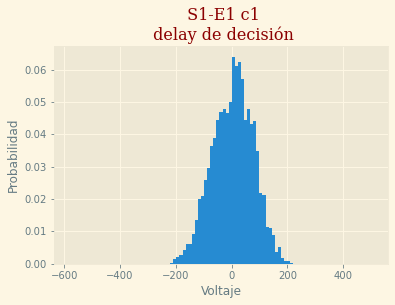

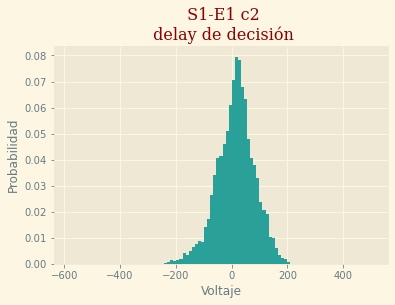

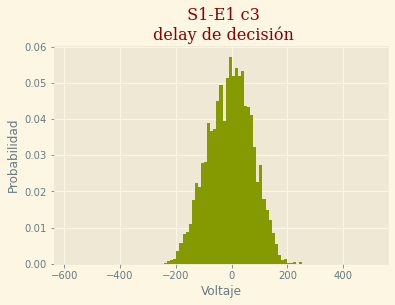

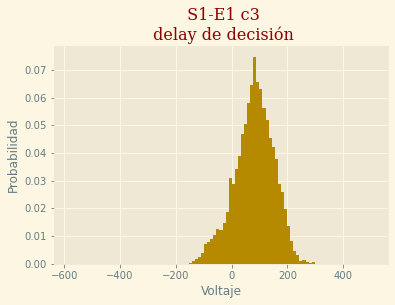

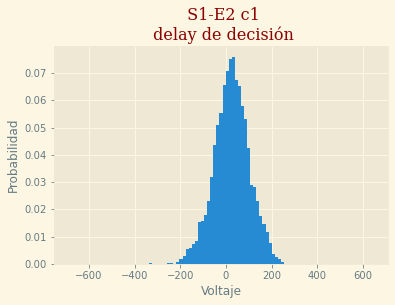

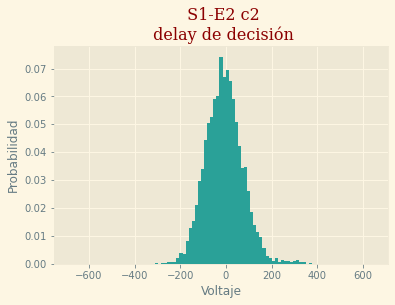

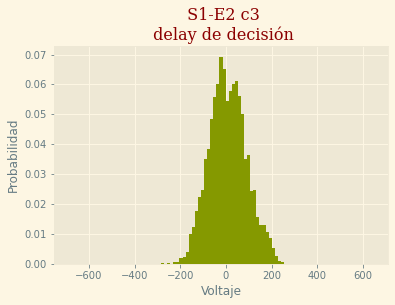

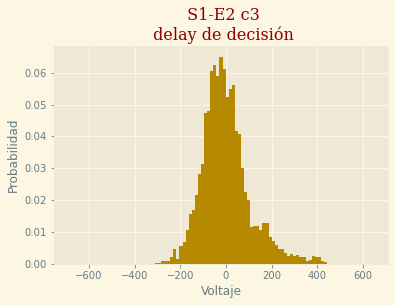

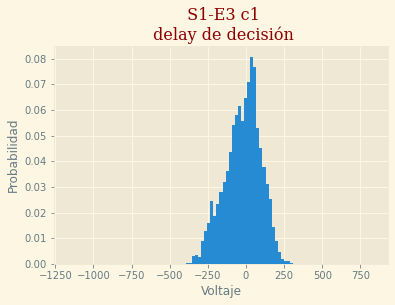

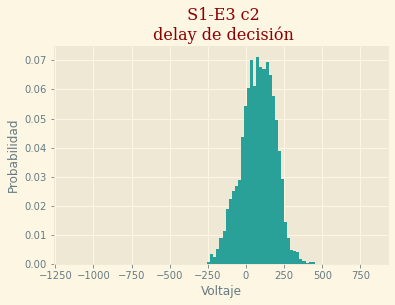

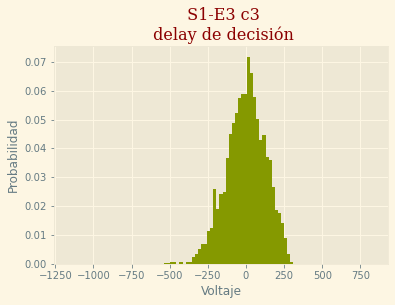

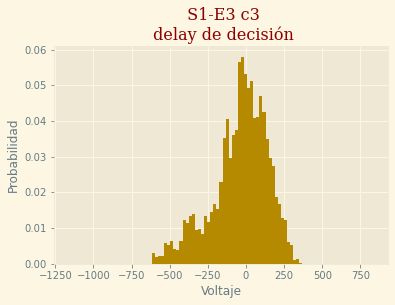

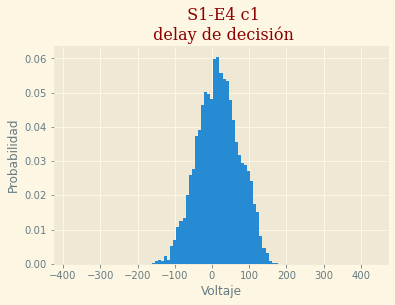

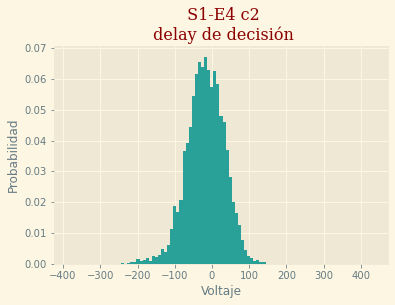

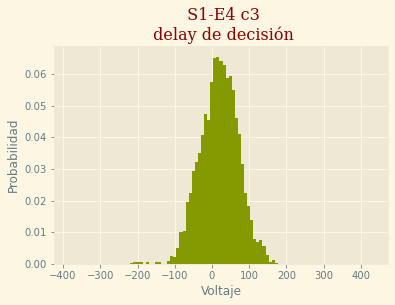

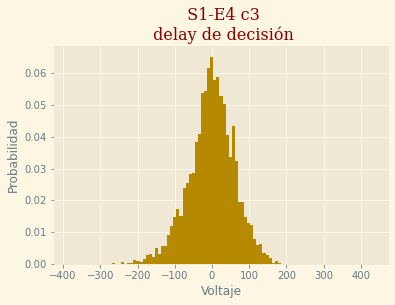

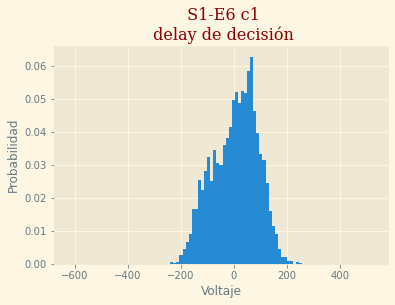

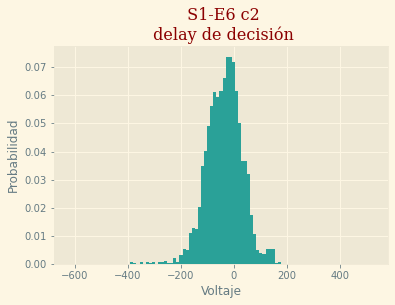

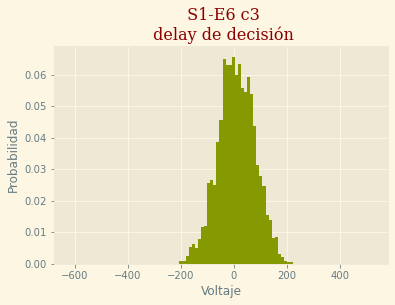

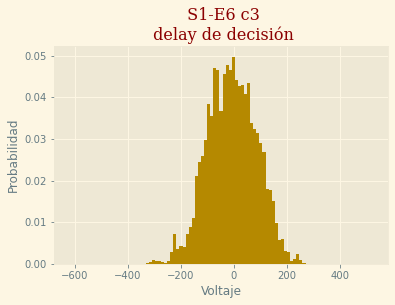

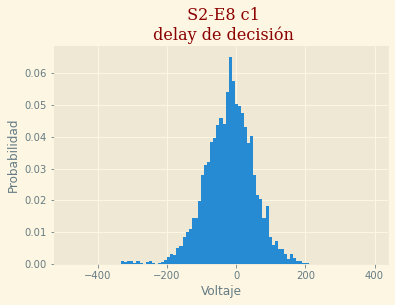

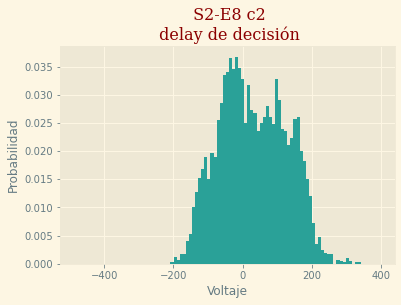

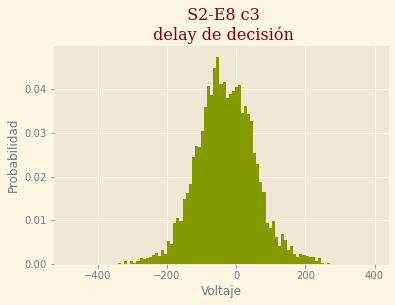

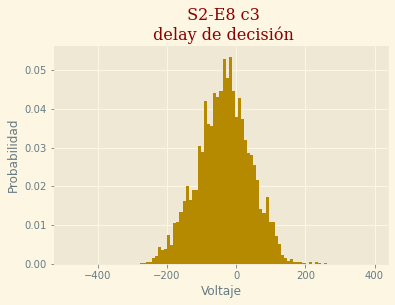

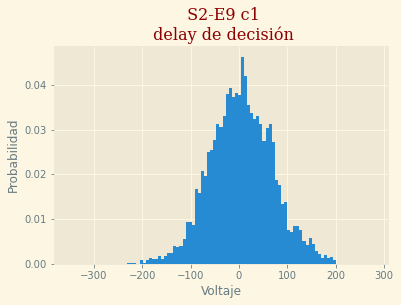

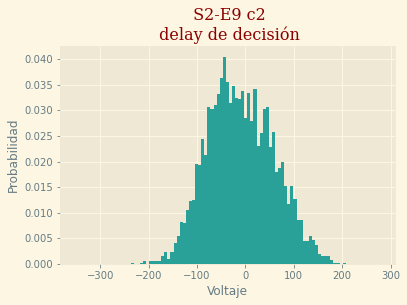

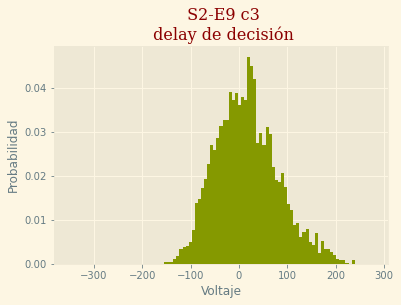

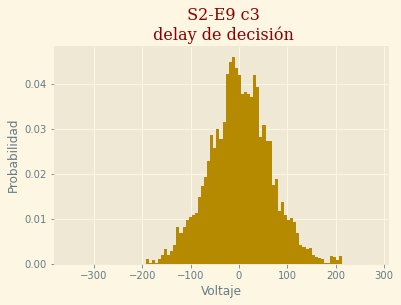

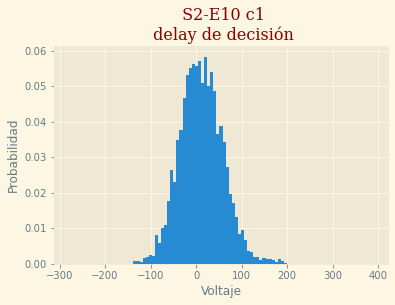

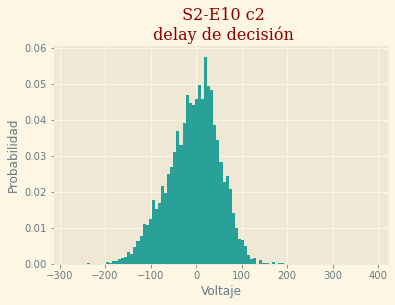

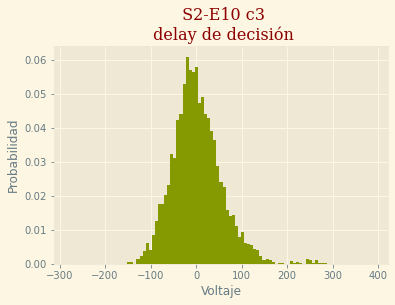

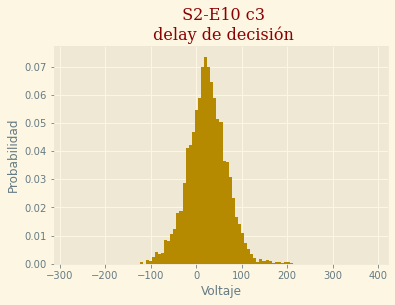

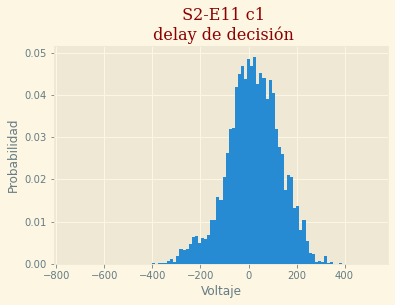

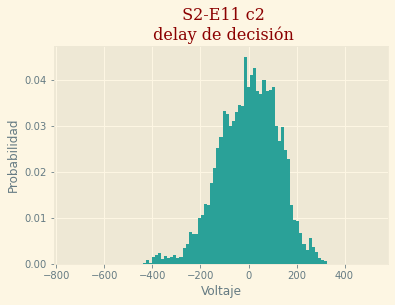

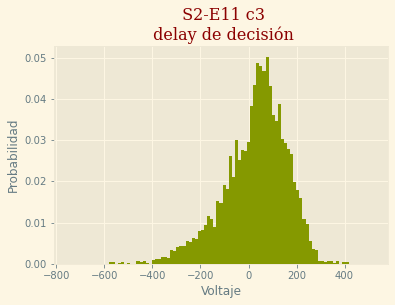

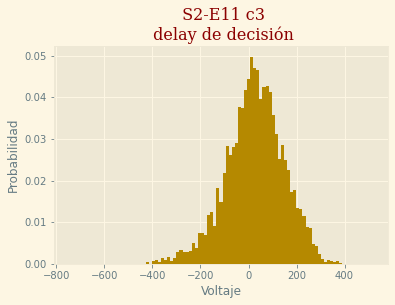

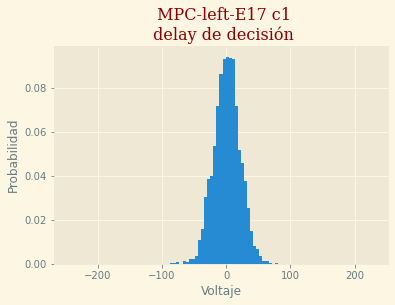

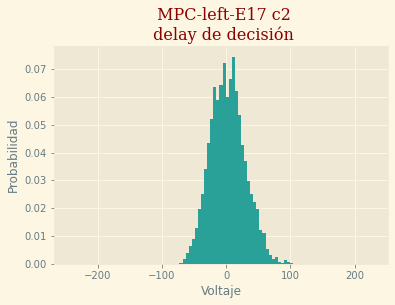

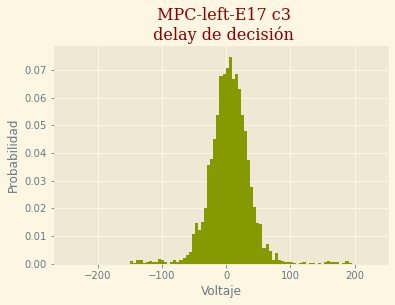

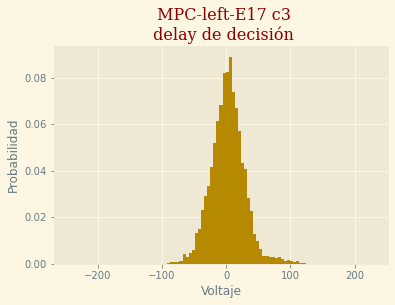

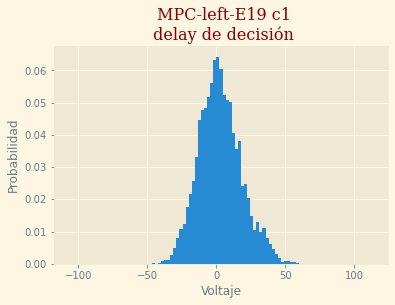

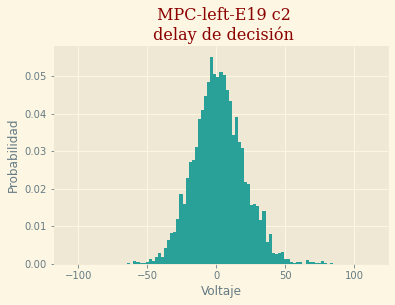

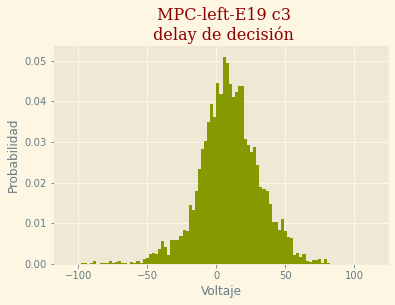

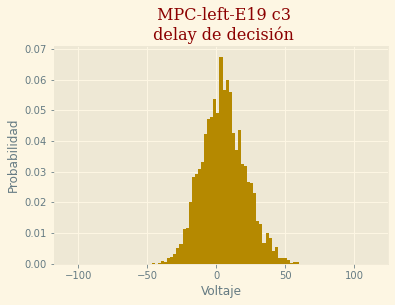

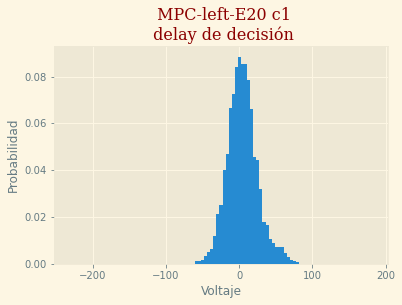

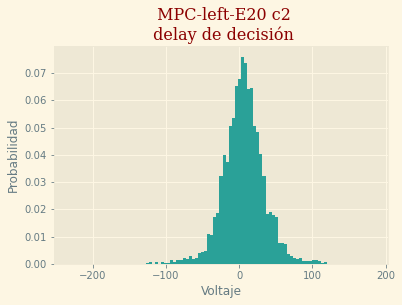

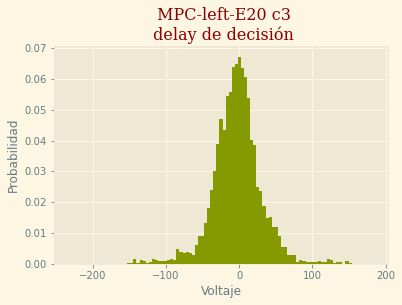

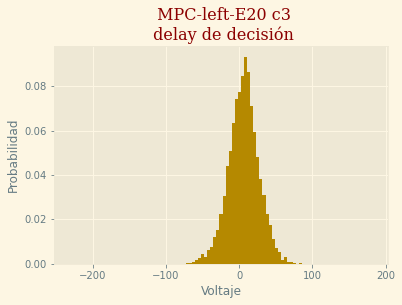

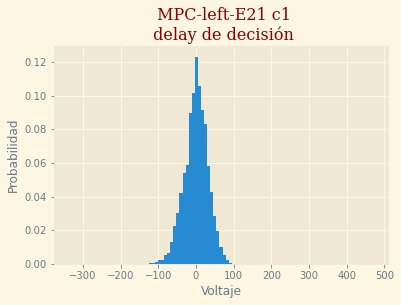

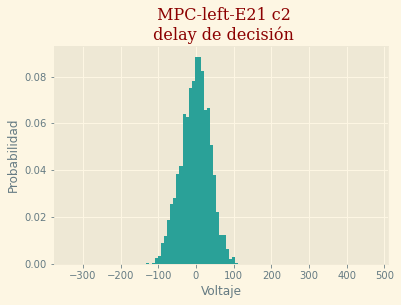

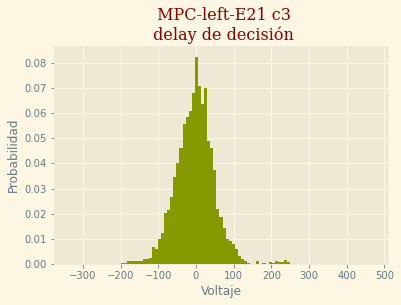

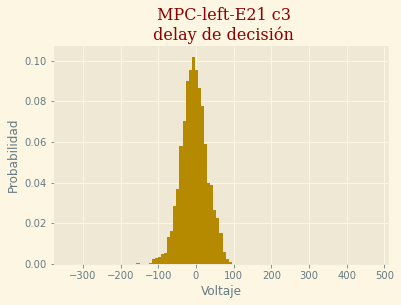

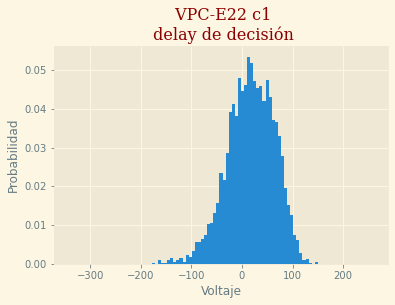

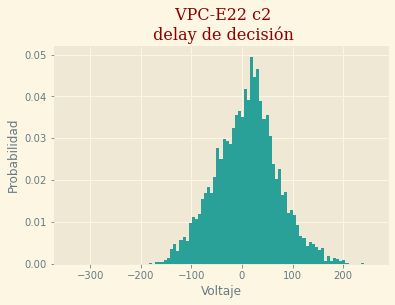

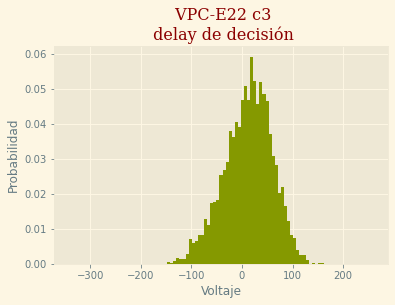

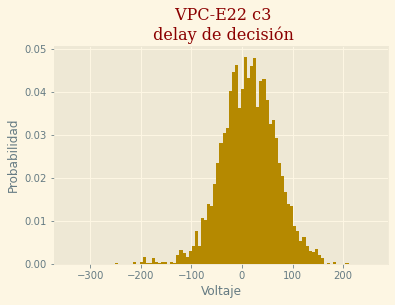

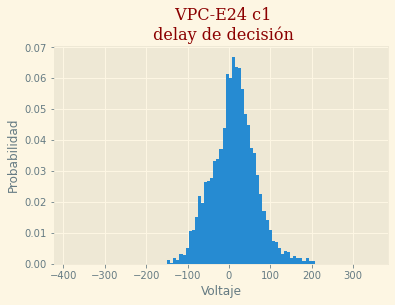

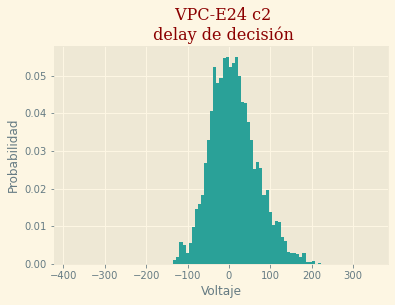

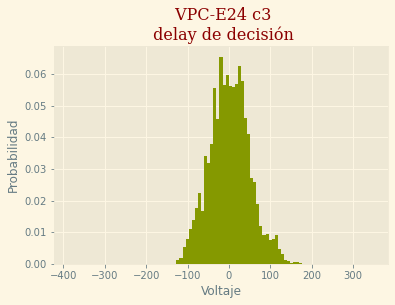

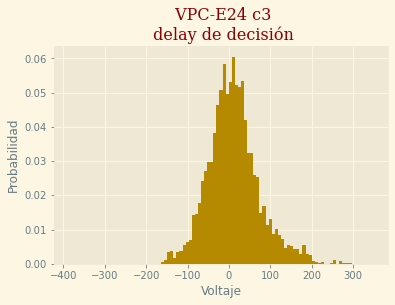

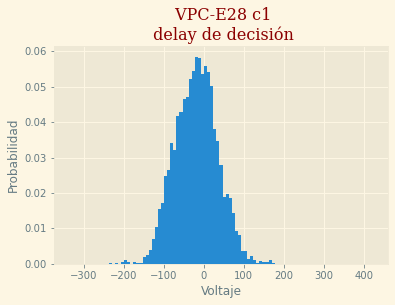

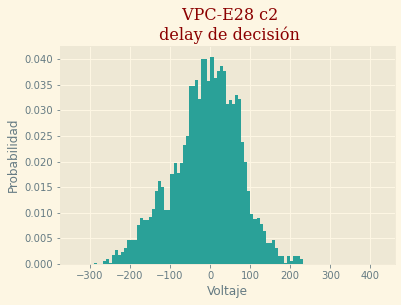

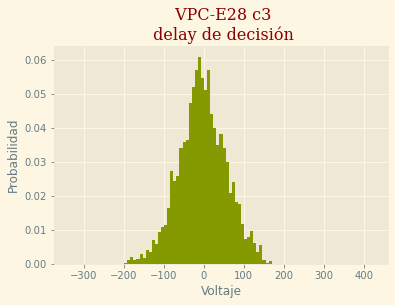

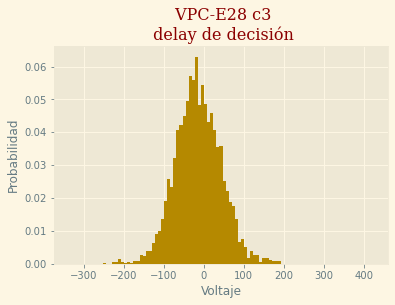

In [52]:
for e in e_keys:
    c1=np.vstack(elt_cond[e][0])[:,i_de]
    c2=np.vstack(elt_cond[e][1])[:,i_de]
    c3=np.vstack(elt_cond[e][2])[:,i_de]
    c4=np.vstack(elt_cond[e][3])[:,i_de]
    dc1,dc2,dc3,dc4,bins=getDistributions3(c1,c2,c3,c4)
    #c1
    plt.bar(bins[1:],dc1[0],width=np.diff(bins),color='C0',label=str(e))
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} c1'+'\n delay de decisión',fontdict_title)
    plt.xlabel('Voltaje')
    plt.ylabel('Probabilidad')
    plt.show()
    #c2
    plt.bar(bins[1:],dc2[0],width=np.diff(bins),color='C1',label=str(e))
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} c2'+'\n delay de decisión',fontdict_title)
    plt.xlabel('Voltaje')
    plt.ylabel('Probabilidad')
    plt.show()
    #c3
    plt.bar(bins[1:],dc3[0],width=np.diff(bins),color='C2',label=str(e))
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} c3'+'\n delay de decisión',fontdict_title)
    plt.xlabel('Voltaje')
    plt.ylabel('Probabilidad')
    plt.show()
    #c4
    plt.bar(bins[1:],dc4[0],width=np.diff(bins),color='C3',label=str(e))
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} c3'+'\n delay de decisión',fontdict_title)
    plt.xlabel('Voltaje')
    plt.ylabel('Probabilidad')
    plt.show()

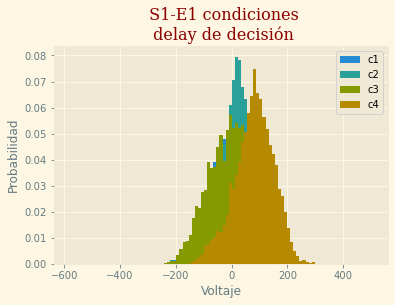

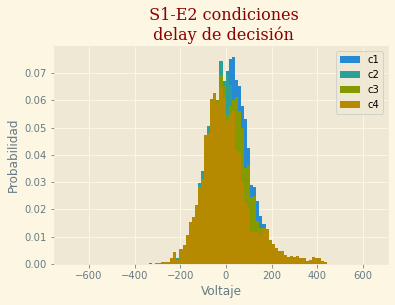

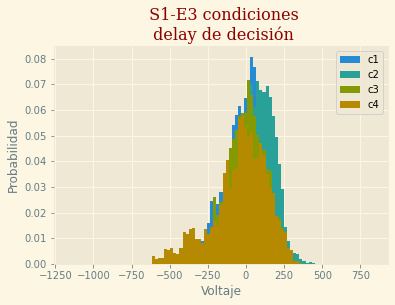

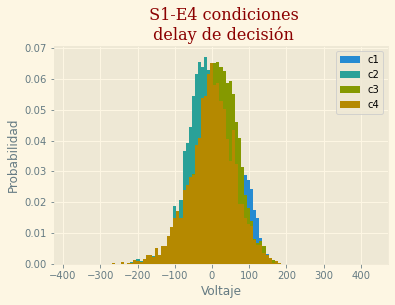

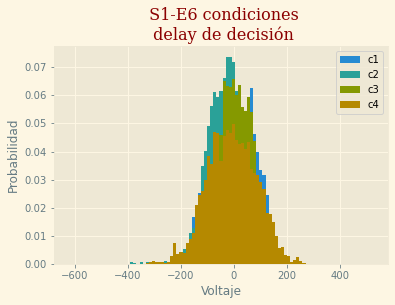

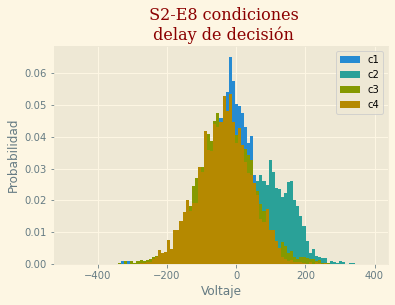

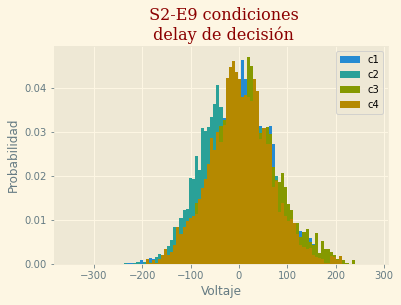

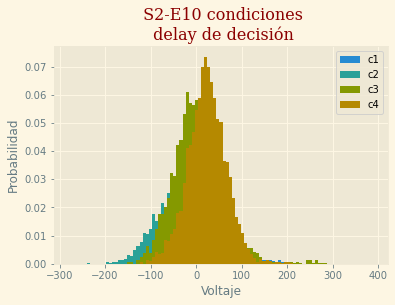

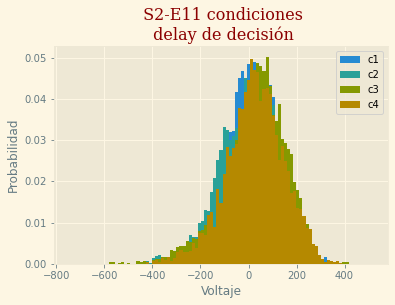

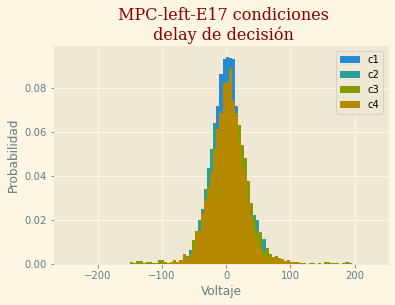

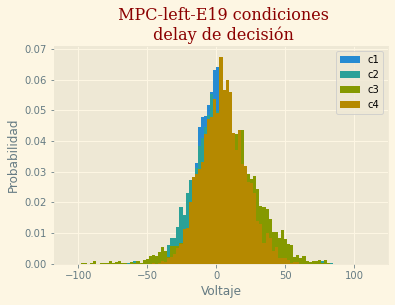

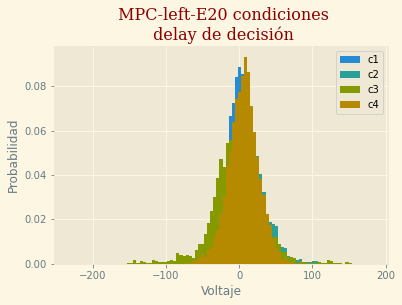

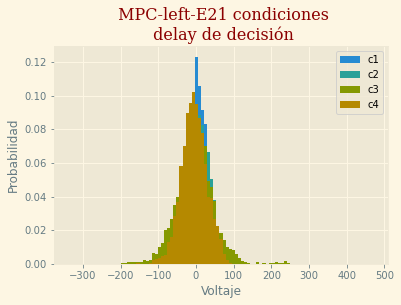

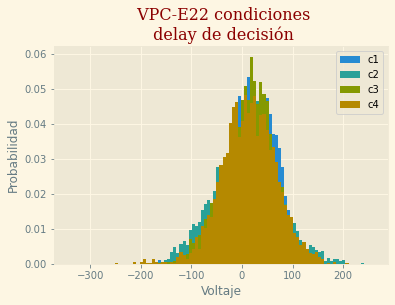

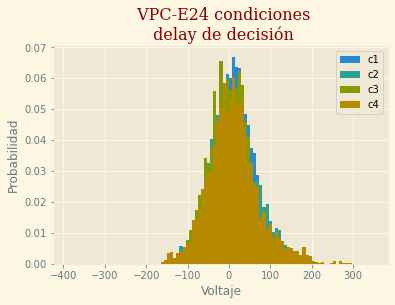

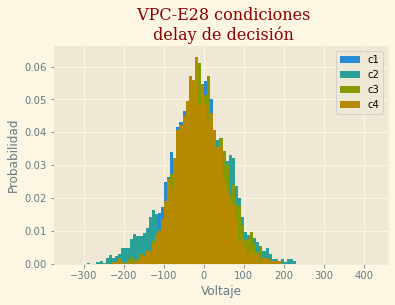

In [55]:
for e in e_keys:
    c1=np.vstack(elt_cond[e][0])[:,i_de]
    c2=np.vstack(elt_cond[e][1])[:,i_de]
    c3=np.vstack(elt_cond[e][2])[:,i_de]
    c4=np.vstack(elt_cond[e][3])[:,i_de]
    dc1,dc2,dc3,dc4,bins=getDistributions3(c1,c2,c3,c4)
    #c1
    plt.bar(bins[1:],dc1[0],width=np.diff(bins),color='C0',label=f'c1')
    plt.bar(bins[1:],dc2[0],width=np.diff(bins),color='C1',label=f'c2')
    plt.bar(bins[1:],dc3[0],width=np.diff(bins),color='C2',label=f'c3')
    plt.bar(bins[1:],dc4[0],width=np.diff(bins),color='C3',label=f'c4')
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    plt.title(f' {e} condiciones'+'\n delay de decisión',fontdict_title)
    plt.xlabel('Voltaje')
    plt.ylabel('Probabilidad')
    plt.legend()
    plt.show()
